In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [3]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can see that some columns are almost empty so i will drop them from my dataset.

In [5]:
house_prices_df.drop(['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],axis=1,inplace=True)

In [6]:
house_prices_df.dropna(inplace=True)

In [7]:
house_prices_df.reset_index()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1090,1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
1091,1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1092,1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


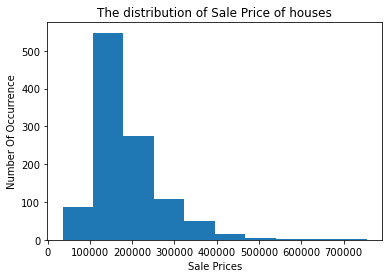

In [8]:
plt.hist(house_prices_df.SalePrice)
plt.title("The distribution of Sale Price of houses")
plt.xlabel("Sale Prices")
plt.ylabel("Number Of Occurrence")
plt.show()

We can see that our target variable is not distributed normally. It's skewed to the right.
Now let us look at the object type features.

In [9]:
i=0
for column in house_prices_df.columns:
    if (house_prices_df[column].dtypes=='O'):
        print(column)
        i+=1
print(i)        

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
38


So,we have 38 object type features.

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [11]:
for column in house_prices_df.columns:
    if (house_prices_df[column].dtypes=='O'):
        house_prices_df[column]=labelencoder.fit_transform(house_prices_df[column])
house_prices_df.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   int32  
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   int32  
 6   LotShape       1094 non-null   int32  
 7   LandContour    1094 non-null   int32  
 8   Utilities      1094 non-null   int32  
 9   LotConfig      1094 non-null   int32  
 10  LandSlope      1094 non-null   int32  
 11  Neighborhood   1094 non-null   int32  
 12  Condition1     1094 non-null   int32  
 13  Condition2     1094 non-null   int32  
 14  BldgType       1094 non-null   int32  
 15  HouseStyle     1094 non-null   int32  
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

In [12]:
y=house_prices_df['SalePrice']
X=house_prices_df.drop(['SalePrice'],axis=1)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [14]:
my_vif=calc_vif(X)
my_vif.head(20)

,variables,VIF
0,Id,4.268072
1,MSSubClass,17.370188
2,MSZoning,31.095545
3,LotFrontage,19.843439
4,LotArea,4.075880
5,Street,337.965042
6,LotShape,4.441559
7,LandContour,21.873501
8,Utilities,NaN
9,LotConfig,5.608709


In [15]:
new_df=house_prices_df.drop(['MSSubClass','MSZoning','LotFrontage','Street','LandContour','Condition2','OverallQual','YearBuilt','YearRemodAdd'],axis=1)

In [16]:
y=new_df['SalePrice']
X=new_df.drop(['SalePrice'],axis=1)

In [17]:
my_vif=calc_vif(X)
my_vif.head(20)

,variables,VIF
0,Id,4.227600
1,LotArea,3.885655
2,LotShape,4.343339
3,Utilities,NaN
4,LotConfig,5.413746
5,LandSlope,1.296578
6,Neighborhood,6.330992
7,Condition1,6.846304
8,BldgType,1.839149
9,HouseStyle,6.749745


In [18]:
new_df=new_df.drop(['Foundation','ExterCond','ExterQual','Exterior2nd','OverallCond'],axis=1)

In [19]:
X=new_df.drop(['SalePrice'],axis=1)

In [20]:
my_vif=calc_vif(X)
my_vif.head(20)

,variables,VIF
0,Id,4.216096
1,LotArea,3.877138
2,LotShape,4.329017
3,Utilities,NaN
4,LotConfig,5.406152
5,LandSlope,1.287287
6,Neighborhood,6.269458
7,Condition1,6.783823
8,BldgType,1.789613
9,HouseStyle,6.687666


In [21]:
new_df=new_df.drop(['BsmtQual','BsmtCond','MasVnrType','Exterior1st'],axis=1)

In [22]:
X=new_df.drop(['SalePrice'],axis=1)

In [23]:
my_vif=calc_vif(X)
my_vif.head(20)

,variables,VIF
0,Id,4.186991
1,LotArea,3.874264
2,LotShape,4.303056
3,Utilities,NaN
4,LotConfig,5.387262
5,LandSlope,1.275292
6,Neighborhood,6.090985
7,Condition1,6.765975
8,BldgType,1.747153
9,HouseStyle,6.610928


In [24]:
new_df=new_df.drop(['BsmtFinSF1','BsmtFinType2'],axis=1)

In [25]:
X=new_df.drop(['SalePrice'],axis=1)

In [26]:
my_vif=calc_vif(X)
my_vif.tail(20)

,variables,VIF
35,Fireplaces,3.157247
36,GarageType,4.643216
37,GarageYrBlt,20043.250747
38,GarageFinish,6.490203
39,GarageCars,40.197549
40,GarageArea,35.820043
41,GarageQual,55.395071
42,GarageCond,81.392197
43,PavedDrive,27.240300
44,WoodDeckSF,2.039116


In [27]:
new_df=new_df.drop(['SaleCondition','SaleType','YrSold','GarageCond','PavedDrive'],axis=1)

In [28]:
X=new_df.drop(['SalePrice'],axis=1)

In [29]:
my_vif=calc_vif(X)
my_vif.tail(20)

,variables,VIF
30,BedroomAbvGr,35.439875
31,KitchenAbvGr,46.818523
32,KitchenQual,14.159934
33,TotRmsAbvGrd,88.964649
34,Functional,51.631665
35,Fireplaces,3.021241
36,GarageType,4.539366
37,GarageYrBlt,276.742427
38,GarageFinish,6.305374
39,GarageCars,39.712928


In [30]:
new_df=new_df.drop(['GarageQual','GarageArea','GarageYrBlt','Functional','TotRmsAbvGrd','BedroomAbvGr'],axis=1)

In [31]:
X=new_df.drop(['SalePrice'],axis=1)

In [32]:
my_vif=calc_vif(X)
my_vif.tail(20)

,variables,VIF
24,LowQualFinSF,inf
25,GrLivArea,inf
26,BsmtFullBath,3.733838
27,BsmtHalfBath,1.223875
28,FullBath,25.090412
29,HalfBath,3.514415
30,KitchenAbvGr,36.472679
31,KitchenQual,12.475346
32,Fireplaces,2.926124
33,GarageType,4.347506


In [33]:
new_df=new_df.drop(['FullBath','KitchenAbvGr','GarageCars'],axis=1)

In [34]:
X=new_df.drop(['SalePrice'],axis=1)

In [35]:
my_vif=calc_vif(X)
my_vif.tail(20)

,variables,VIF
21,Electrical,15.696826
22,1stFlrSF,inf
23,2ndFlrSF,inf
24,LowQualFinSF,inf
25,GrLivArea,inf
26,BsmtFullBath,3.581427
27,BsmtHalfBath,1.208520
28,HalfBath,3.013394
29,KitchenQual,11.292729
30,Fireplaces,2.886117


In [36]:
new_df=new_df.drop(['TotalBsmtSF','GrLivArea','LowQualFinSF','2ndFlrSF'],axis=1)

In [37]:
X=new_df.drop(['SalePrice'],axis=1)

In [38]:
my_vif=calc_vif(X)
my_vif.tail(20)

,variables,VIF
17,Heating,1.239284
18,HeatingQC,2.416567
19,CentralAir,21.157217
20,Electrical,15.670453
21,1stFlrSF,26.277141
22,BsmtFullBath,3.272274
23,BsmtHalfBath,1.201049
24,HalfBath,2.431784
25,KitchenQual,11.239309
26,Fireplaces,2.802166


In [39]:
new_df=new_df.drop(['1stFlrSF','Electrical','CentralAir'],axis=1)

In [40]:
X=new_df.drop(['SalePrice'],axis=1)

In [41]:
my_vif=calc_vif(X)
my_vif

,variables,VIF
0,Id,3.942885
1,LotArea,3.583325
2,LotShape,4.066741
3,Utilities,NaN
4,LotConfig,4.992371
5,LandSlope,1.242689
6,Neighborhood,5.482769
7,Condition1,5.874644
8,BldgType,1.306948
9,HouseStyle,4.768440


In [42]:
new_df.drop(['Id','Utilities'],axis=1,inplace=True)

In [43]:
new_df

,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,...,GarageFinish,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,8450,3,4,0,5,2,0,5,1,1,...,1,0,61,0,0,0,0,0,2,208500
1,9600,3,2,0,24,1,0,2,1,1,...,1,298,0,0,0,0,0,0,5,181500
2,11250,0,4,0,5,2,0,5,1,1,...,1,0,42,0,0,0,0,0,9,223500
3,9550,0,0,0,6,2,0,5,1,1,...,2,0,35,272,0,0,0,0,2,140000
4,14260,0,2,0,15,2,0,5,1,1,...,1,192,84,0,0,0,0,0,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,3,4,0,8,2,0,5,1,1,...,1,0,40,0,0,0,0,0,8,175000
1456,13175,3,4,0,14,2,0,2,1,1,...,2,349,0,0,0,0,0,0,2,210000
1457,9042,3,4,0,6,2,0,5,1,1,...,1,0,60,0,0,0,0,2500,5,266500
1458,9717,3,4,0,12,2,0,2,3,1,...,2,366,0,112,0,0,0,0,4,142125


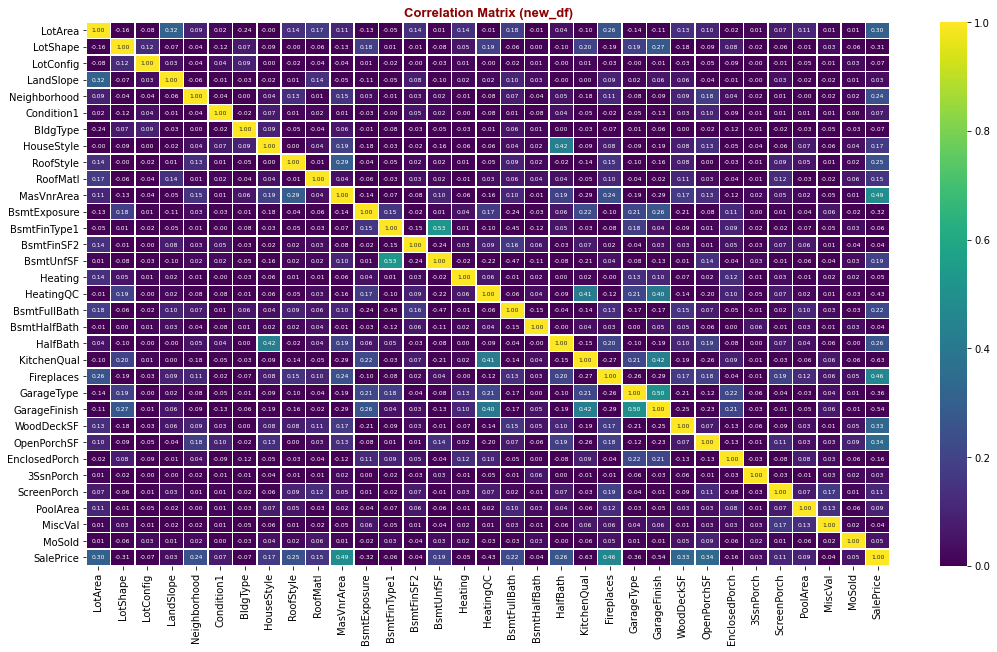

In [44]:
plt.figure(figsize=(18,10))
sns.heatmap(new_df.corr(), annot=True, fmt='.2f', annot_kws={"size": 6}, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Correlation Matrix (new_df)", fontdict=title_font)

plt.show()

In [45]:
X=new_df.drop(['SalePrice'],axis=1)

Up to here, I wanted to get rid of multicollinearity using VIF. It should be and iterative action since everytime we apply it, VIF values changes.

In [46]:
lrm = linear_model.LinearRegression()

In [47]:
lrm.fit(X, y)

LinearRegression()

In [48]:
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 1.03525663e+00 -3.45647836e+03 -9.82105351e+02 -4.14312646e+03
  1.03286529e+03  4.77355327e+02 -3.99978879e+03  5.65152031e+01
  5.39832257e+03  1.18810376e+04  8.12185182e+01 -6.39885358e+03
 -2.23025918e+03 -4.74279423e+00  2.02035814e+01 -4.32611084e+03
 -5.70492972e+03  1.23753233e+04 -1.62554381e+03  1.53618643e+04
 -2.81771503e+04  1.78966035e+04 -6.76832257e+02 -1.15923334e+04
  5.63530244e+01  9.38948553e+01 -2.21706563e+01  5.45883709e+01
  5.34002339e+01  3.45292076e+01 -3.71533585e+00 -1.11274082e+02]

Intercept: 
 211360.05652585867


In [49]:
import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     79.95
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          7.54e-257
Time:                        22:56:27   Log-Likelihood:                -13274.
No. Observations:                1094   AIC:                         2.661e+04
Df Residuals:                    1061   BIC:                         2.678e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.114e+05   1.17e+04     18.065      0.000    1.88e+05    2.34e+05
LotArea           1.0353      0.201      5.148      0.000       0.641       1.430
LotShape      -3456.4784   1125.097     -3.072      0.002   -5664.147   -1248.810
LotConfig      -982.1054    902.244     -1.089      0.277   -2752.490     788.280
LandSlope     -4143.1265   6367.935     -0.651      0.515   -1.66e+04    8352.052
Neighborhood   1032.8653    240.899      4.288      0.000     560.172    1505.558
Condition1      477.3553   1585.217      0.301      0.763   -2633.160    3587.871
BldgType      -3999.7888   1212.575     -3.299      0.001   -6379.106   -1620.472
HouseStyle       56.5152    868.360      0.065      0.948   -1647.383    1760.413
RoofStyle      5398.3226   1777.894      3.036      0.002    1909.735    8886.910
RoofMatl       1.188e+04   3147.181      3.775      0.000    5705.631    1.81e+04
MasVnrArea       81.2185      8.382      9.690      0.000      64.772      97.665
BsmtExposure  -6398.8536   1365.988     -4.684      0.000   -9079.198   -3718.510
BsmtFinType1  -2230.2592    982.206     -2.271      0.023   -4157.546    -302.973
BsmtFinSF2       -4.7428      9.205     -0.515      0.606     -22.805      13.320
BsmtUnfSF        20.2036      4.559      4.431      0.000      11.258      29.149
Heating       -4326.1108   8312.825     -0.520      0.603   -2.06e+04     1.2e+04
HeatingQC     -5704.9297    945.994     -6.031      0.000   -7561.162   -3848.697
BsmtFullBath   1.238e+04   3647.393      3.393      0.001    5218.400    1.95e+04
BsmtHalfBath  -1625.5438   6246.762     -0.260      0.795   -1.39e+04    1.06e+04
HalfBath       1.536e+04   3311.024      4.640      0.000    8864.965    2.19e+04
KitchenQual   -2.818e+04   1995.775    -14.118      0.000   -3.21e+04   -2.43e+04
Fireplaces      1.79e+04   2532.932      7.066      0.000    1.29e+04    2.29e+04
GarageType     -676.8323    935.194     -0.724      0.469   -2511.871    1158.207
GarageFinish  -1.159e+04   2324.892     -4.986      0.000   -1.62e+04   -7030.425
WoodDeckSF       56.3530     12.361      4.559      0.000      32.098      80.608
OpenPorchSF      93.8949     23.725      3.958      0.000      47.341     140.448
EnclosedPorch   -22.1707     24.262     -0.914      0.361     -69.777      25.435
3SsnPorch        54.5884     47.249      1.155      0.248     -38.124     147.301
ScreenPorch      53.4002     25.557      2.089      0.037       3.252     103.548
PoolArea         34.5292     35.299      0.978      0.328     -34.735     103.794
MiscVal          -3.7153      8.595     -0.432      0.666     -20.581      13.150
MoSold         -111.2741    522.575     -0.213      0.831   -1136.673     914.125
==============================================================================
Omnibus:                      321.721   Durbin-Watso